In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import my_statistics as ms
from tqdm.notebook import tqdm
import tensorflow as tf

####  Activation functions

In [2]:
def sigmoid(z):
    return 1/(1+ np.e**-z)

In [3]:
def ReLU(z):
    return np.where(z<0, 0, z)

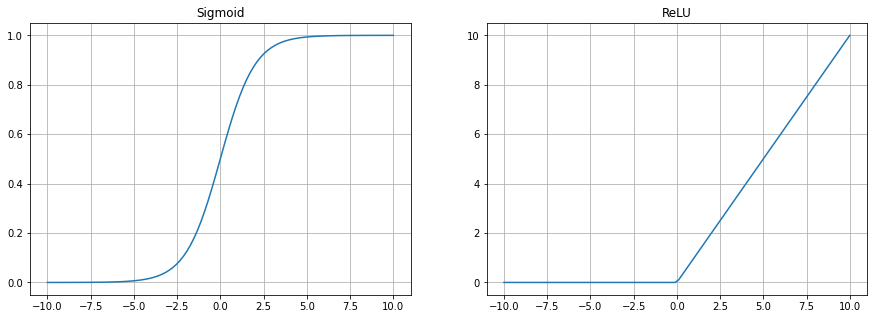

In [4]:
z_array = np.linspace(-10,10, 100)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Sigmoid')
ax[0].plot(z_array, sigmoid(z_array))
ax[1].set_title('ReLU')
ax[1].plot(z_array, ReLU(z_array))
ax[0].grid()
ax[1].grid()

####  MNIST dataset

In [5]:
from keras.datasets import mnist

In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

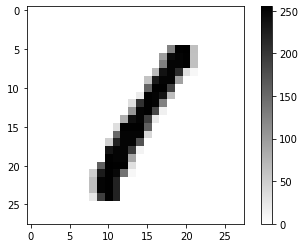

In [7]:
plt.imshow(train_X[3,:,:], cmap='binary', vmin=0, vmax=255)
plt.colorbar()

In [8]:
train_X.shape, test_X.shape

((60000, 28, 28), (10000, 28, 28))

#### Classification with KNN

In [9]:
train_X_ = train_X.reshape(60000, 28*28)
test_X_ = test_X.reshape(10000, 28*28)

In [72]:
y_pred_KNN = []
for i in tqdm(test_X_[::10]):
    y_pred_KNN.append(ms.KNN(i, train_X_, train_y, K=10))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [74]:
accuracy = 1 - ms.classification_error_rate(np.array(y_pred_KNN), test_y[::10])
print(f'Test data prediction accuracy is: {accuracy*100:.2f} %')

Test data prediction accuracy is: 84.70 %


####  Classification with decision trees

In [10]:
import decision_trees_class as dtc

In [14]:
tree_ = dtc.DecisionTree(pd.DataFrame(train_X_[::10]), train_y[::10], s_div=3,
                         criterion='Gini', max_leaf_size=100)

[8, 5992]
[8, 3, 5989]
[8, 3, 2, 5987]
[8, 3, 2, 2, 5985]
[8, 3, 2, 2, 1, 5984]
[8, 3, 2, 2, 1, 3, 5981]
[8, 3, 2, 2, 1, 3, 1, 5980]
[8, 3, 2, 2, 1, 3, 1, 10, 5970]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 5966]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 5963]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 5962]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 5961]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 5960]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 5959]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 5958]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 5957]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 5956]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5955]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5954]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5953]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5952]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5951]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5889]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 5887]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 5886]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 5884]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 5811]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 5809]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 5808]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 5722]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 5721]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 5466]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 5465]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 5379]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 3

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 5233]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 5193]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 5002]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 4864]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 4838]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 4815]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 4752]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 4693]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4639]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 4523]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 4471]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 4389]
[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 4360]
[8, 3, 2, 2, 1

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

[8, 3, 2, 2, 1, 3, 1, 10, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 29, 7, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 4, 1, 1, 14, 13, 8, 7, 7, 6, 5, 2, 1, 1, 2, 36, 1, 1, 46, 1, 74, 15, 17, 14, 4, 3, 1, 5, 1, 1, 31, 1, 1, 1, 8, 2, 2, 4, 1, 2, 1, 1, 1, 15, 34, 1, 6, 6, 1, 1, 6, 1, 1, 6, 12, 50, 21, 3, 2, 1, 5, 5, 3, 1, 20, 9, 9, 1, 1, 2, 1, 6, 2, 1, 1, 5, 1, 1, 4, 4, 1, 1, 99, 40, 5, 1, 4, 7, 24, 2, 2, 1, 2, 2, 1, 11, 9, 10, 2, 2, 1, 1, 2, 3, 73, 18, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 1, 3, 1, 1, 1, 3, 29, 1, 2, 1, 4, 17, 11, 12, 3, 3, 3, 6, 5, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 44, 2, 4, 2, 1, 19, 6, 10, 11, 9, 52, 2, 2, 17, 1, 10, 5, 6, 4, 5, 2, 6, 3, 2, 2, 61, 4, 1, 2, 1, 2, 1, 1, 3, 13, 2, 1, 4, 2, 1, 20, 4, 2, 2, 1, 2

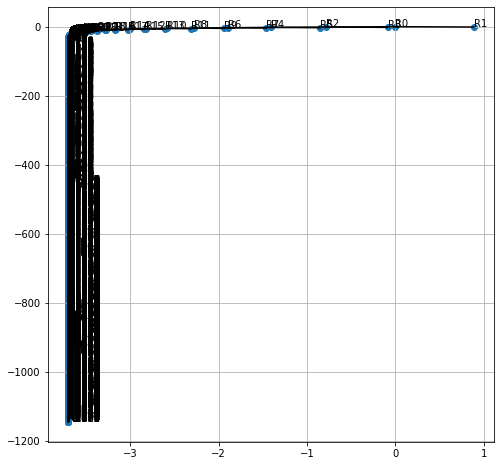

In [15]:
tree_.plot_tree()

In [17]:
test_X_.shape

(10000, 784)

In [ ]:
y_pred_tree, _ = tree_.predict(pd.DataFrame(test_X_[:100]))

In [ ]:
accuracy = 1 - ms.classification_error_rate(np.array(y_pred_tree), test_y[:100])
print(f'Test data prediction accuracy is: {accuracy*100:.2f} %')

####  Classification with NN

In [75]:
# data normalization
train_X_n = train_X_/255
test_X_n = test_X_/255

In [ ]:
# loading dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [ ]:
# training pipeline
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
# evaulation pipeline
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [ ]:
# creating and training the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)